##Методические указания

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [ ]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


<Axes: xlabel='SO2', ylabel='Count'>

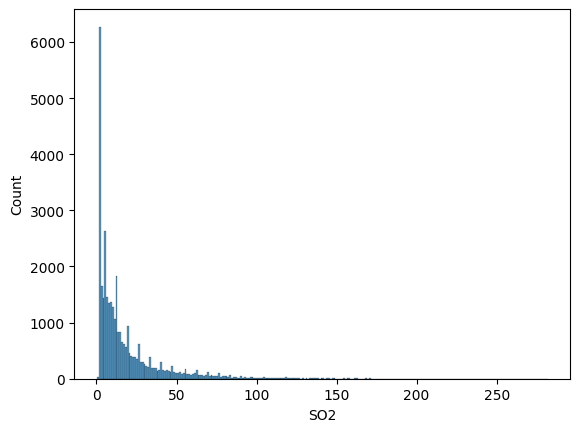

In [ ]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

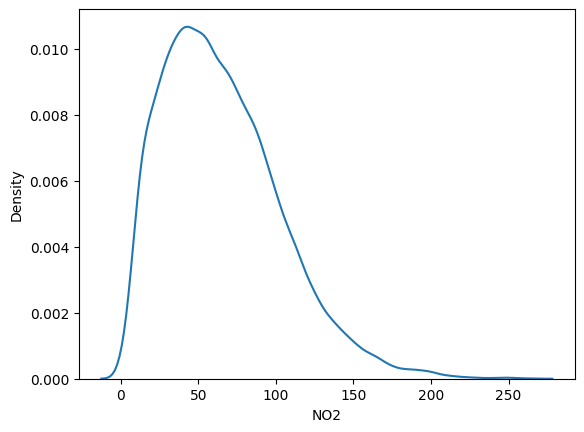

In [ ]:
sns.kdeplot(prsa_data.NO2)

In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


<Axes: xlabel='SO2', ylabel='Density'>

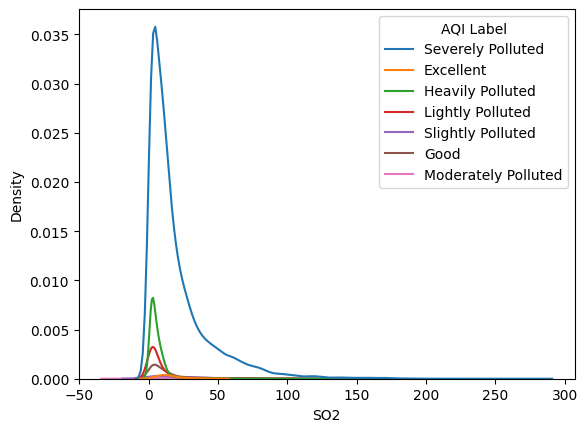

In [ ]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='CO', ylabel='Density'>

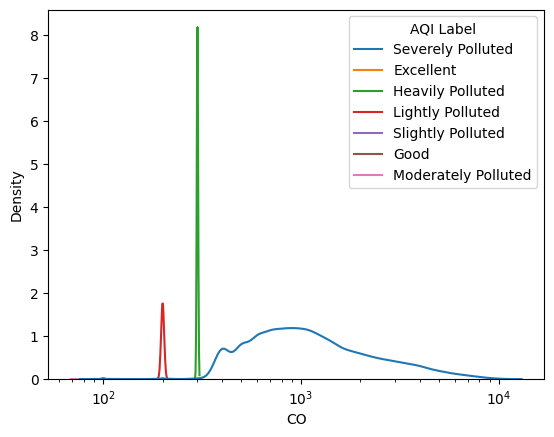

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

In [ ]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [ ]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [ ]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<Axes: >

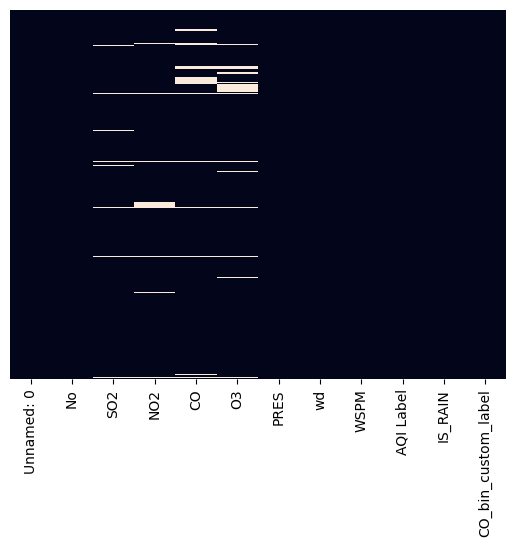

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

In [ ]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [ ]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [ ]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [ ]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


In [ ]:
prsa_data.SO2 = np.log(prsa_data.SO2)

##Задания для самостоятельного выполнения



#### 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

In [4]:
import matplotlib.pyplot as plt


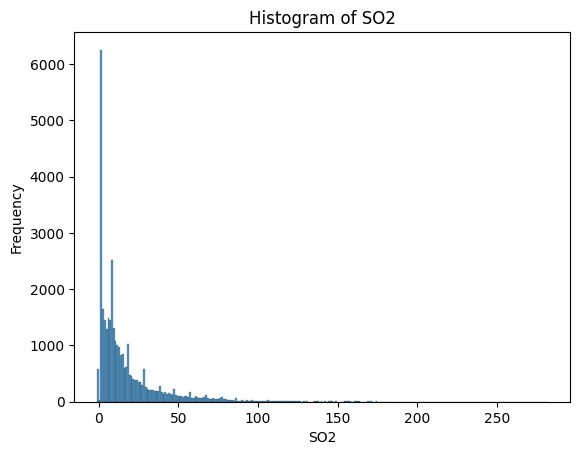

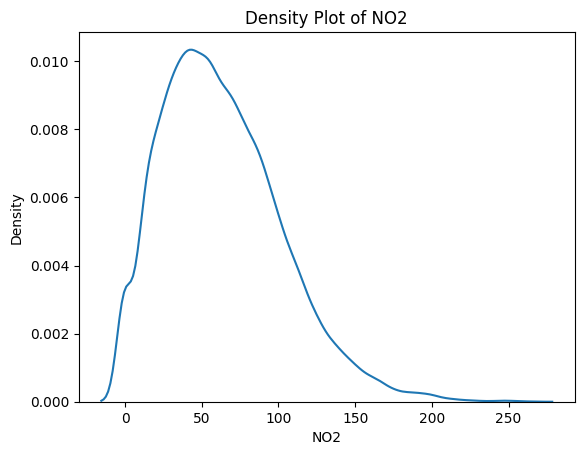

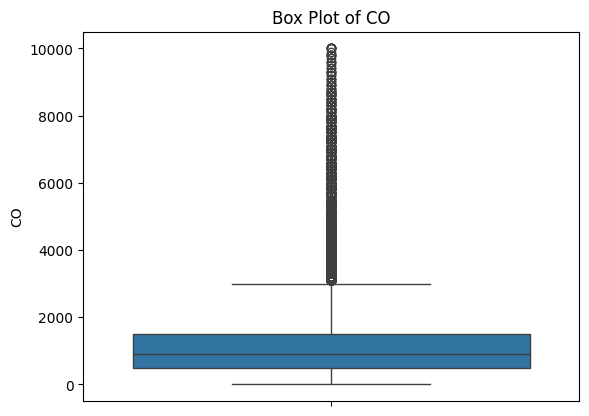

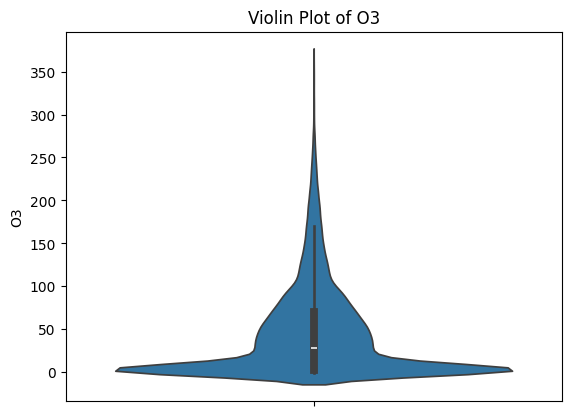

In [5]:
sns.histplot(prsa_data['SO2'].dropna(), kde=False)
plt.title('Histogram of SO2')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(prsa_data['NO2'].dropna())
plt.title('Density Plot of NO2')
plt.xlabel('NO2')
plt.ylabel('Density')
plt.show()

sns.boxplot(y=prsa_data['CO'].dropna())
plt.title('Box Plot of CO')
plt.ylabel('CO')
plt.show()

sns.violinplot(y=prsa_data['O3'].dropna())
plt.title('Violin Plot of O3')
plt.ylabel('O3')
plt.show()


#### 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [6]:
# Функция для адаптивного клиппинга через процентили
def adaptive_clipping(df, columns, lower_percentile=1, upper_percentile=99):
    for col in columns:
        lower_bound = np.percentile(df[col].dropna(), lower_percentile)
        upper_bound = np.percentile(df[col].dropna(), upper_percentile)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Определим численные столбцы
numeric_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

# Применим адаптивный клиппинг к датасету
prsa_data_clipped = adaptive_clipping(prsa_data.copy(), numeric_columns)

# Выведем описательную статистику для проверки результатов
prsa_data_clipped.describe()


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,17.771619,63.013958,1239.169405,45.578818,1011.081119,0.067653,1.492728
std,10122.249256,10122.249256,21.037405,38.355769,1211.207471,53.539667,10.287536,0.896833,1.073061
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,991.400000,-1.000000,0.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,108.000000,175.000000,6300.000000,233.967123,1032.000000,72.500000,5.100000


Адаптивный клиппинг через процентили успешно выполнен. Описательная статистика после клиппинга показывает, что экстремальные значения были ограничены 1-м и 99-м процентилями для каждого численного признака. Например, максимальные значения для признаков SO2, NO2, CO, O3, PRES, и WSPM стали значительно ниже, чем до клиппинга.

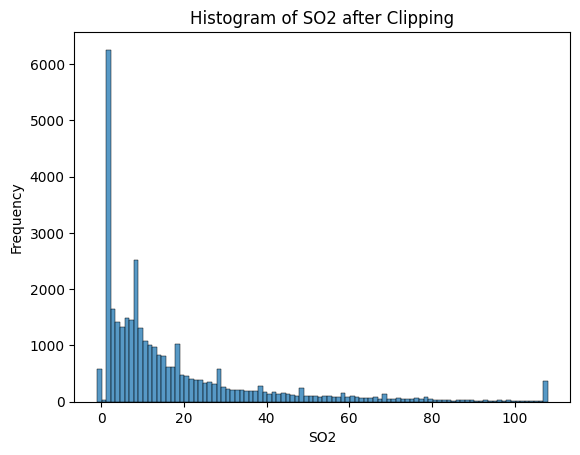

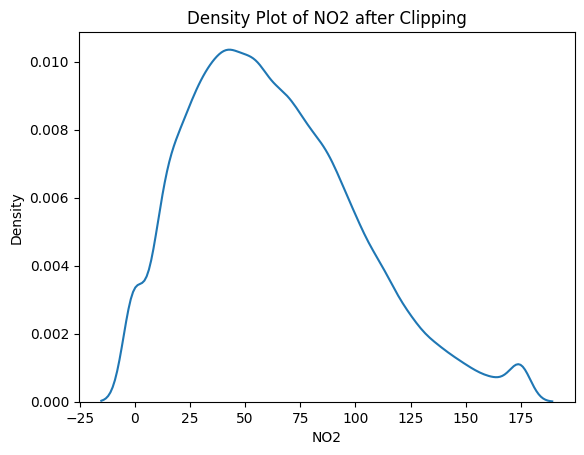

In [7]:
sns.histplot(prsa_data_clipped['SO2'].dropna(), kde=False)
plt.title('Histogram of SO2 after Clipping')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(prsa_data_clipped['NO2'].dropna())
plt.title('Density Plot of NO2 after Clipping')
plt.xlabel('NO2')
plt.ylabel('Density')
plt.show()

Результаты показывают, что после клиппинга распределения численных признаков стали более ограниченными, что поможет уменьшить влияние выбросов на модель машинного обучения.

####3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [8]:
# Заполнение пропусков медианой для каждого численного признака
prsa_data_filled = prsa_data_clipped.copy()
for col in numeric_columns:
    prsa_data_filled[col] = prsa_data_filled[col].fillna(prsa_data_filled[col].median())

# Проверим, что пропусков больше нет
missing_values = prsa_data_filled.isnull().sum()

filled_description = prsa_data_filled.describe()

missing_values, filled_description


(Unnamed: 0    0
 No            0
 SO2           0
 NO2           0
 CO            0
 O3            0
 PRES          0
 RAIN          0
 wd            0
 WSPM          0
 AQI Label     0
 dtype: int64,
          Unnamed: 0            No           SO2           NO2            CO  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17531.500000  17532.500000     17.771619     63.013958   1239.169405   
 std    10122.249256  10122.249256     21.037405     38.355769   1211.207471   
 min        0.000000      1.000000     -1.000000     -1.000000     -1.000000   
 25%     8765.750000   8766.750000      4.000000     34.000000    500.000000   
 50%    17531.500000  17532.500000     10.000000     58.000000    900.000000   
 75%    26297.250000  26298.250000     22.276800     87.000000   1500.000000   
 max    35063.000000  35064.000000    108.000000    175.000000   6300.000000   
 
                  O3          PRES          RAIN          WSPM  
 count  350

Пропуски успешно заполнены медианой для всех численных признаков, за исключением столбца RAIN, который содержит 20 пропущенных значений.

In [9]:
# Заполнение пропусков медианой для столбца RAIN
prsa_data_filled['RAIN'] = prsa_data_filled['RAIN'].fillna(prsa_data_filled['RAIN'].median())

# Проверим, что пропусков больше нет
missing_values_after_rain_fill = prsa_data_filled.isnull().sum()

final_description = prsa_data_filled.describe()

missing_values_after_rain_fill, final_description


(Unnamed: 0    0
 No            0
 SO2           0
 NO2           0
 CO            0
 O3            0
 PRES          0
 RAIN          0
 wd            0
 WSPM          0
 AQI Label     0
 dtype: int64,
          Unnamed: 0            No           SO2           NO2            CO  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17531.500000  17532.500000     17.771619     63.013958   1239.169405   
 std    10122.249256  10122.249256     21.037405     38.355769   1211.207471   
 min        0.000000      1.000000     -1.000000     -1.000000     -1.000000   
 25%     8765.750000   8766.750000      4.000000     34.000000    500.000000   
 50%    17531.500000  17532.500000     10.000000     58.000000    900.000000   
 75%    26297.250000  26298.250000     22.276800     87.000000   1500.000000   
 max    35063.000000  35064.000000    108.000000    175.000000   6300.000000   
 
                  O3          PRES          RAIN          WSPM  
 count  350

Теперь все пропуски в данных успешно заполнены, и пропусков больше нет. Вот сводка по датасету после обработки:

####4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

prsa_data_normalized = prsa_data_filled.copy()

numeric_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

# Применим стандартную нормализацию для признаков с нормальным распределением
standard_scaler = StandardScaler()
prsa_data_normalized[['PRES', 'WSPM']] = standard_scaler.fit_transform(prsa_data_normalized[['PRES', 'WSPM']])

# Применим минимаксную нормализацию для признаков с распределением в широком диапазоне
minmax_scaler = MinMaxScaler()
prsa_data_normalized[['SO2', 'NO2', 'O3']] = minmax_scaler.fit_transform(prsa_data_normalized[['SO2', 'NO2', 'O3']])

# Применим нормализацию методом Робуста для признаков с выбросами
robust_scaler = RobustScaler()
prsa_data_normalized[['CO']] = robust_scaler.fit_transform(prsa_data_normalized[['CO']])

# Применим логарифмическую нормализацию для признаков с большой асимметрией (если необходимо)
prsa_data_normalized['CO'] = np.log1p(prsa_data_normalized['CO'])


normalized_description = prsa_data_normalized.describe()
normalized_description


,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,3.506400e+04
mean,17531.500000,17532.500000,0.172217,0.363716,-0.065154,0.198235,-9.169130e-15,0.067653,8.673063e-17
std,10122.249256,10122.249256,0.193004,0.217931,0.889115,0.227860,1.000014e+00,0.896833,1.000014e+00
min,0.000000,1.000000,0.000000,0.000000,-2.312635,0.000000,-1.913131e+00,-1.000000,-1.391113e+00
25%,8765.750000,8766.750000,0.045872,0.198864,-0.510826,0.014459,-8.341396e-01,0.000000,-6.455713e-01
50%,17531.500000,17532.500000,0.100917,0.335227,0.000000,0.120682,-2.732652e-02,0.000000,-2.728006e-01
75%,26297.250000,26298.250000,0.213549,0.500000,0.470004,0.300248,8.086485e-01,0.000000,4.727407e-01
max,35063.000000,35064.000000,1.000000,1.000000,1.856298,1.000000,2.033449e+00,72.500000,3.361713e+00


####5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

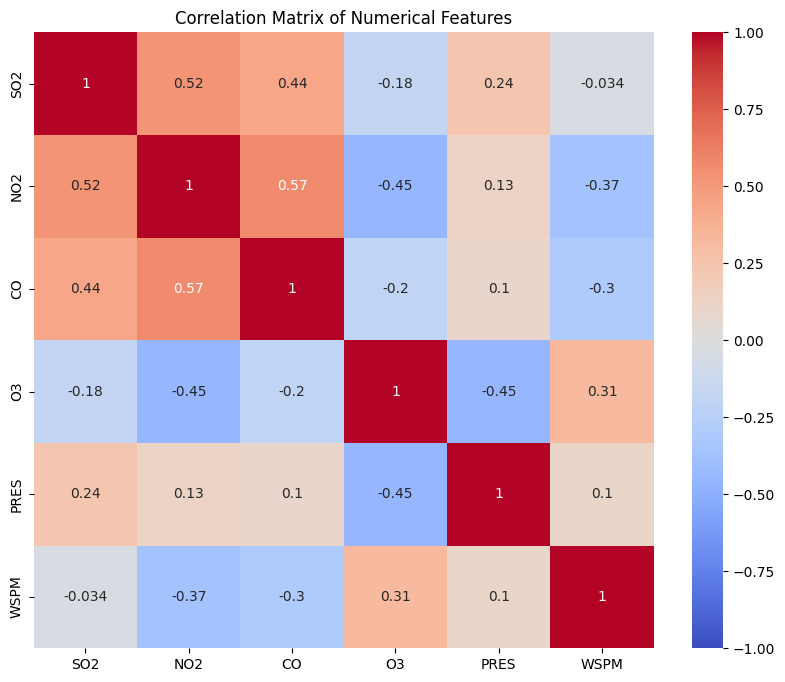

In [12]:
correlation_matrix = prsa_data_normalized[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


####6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

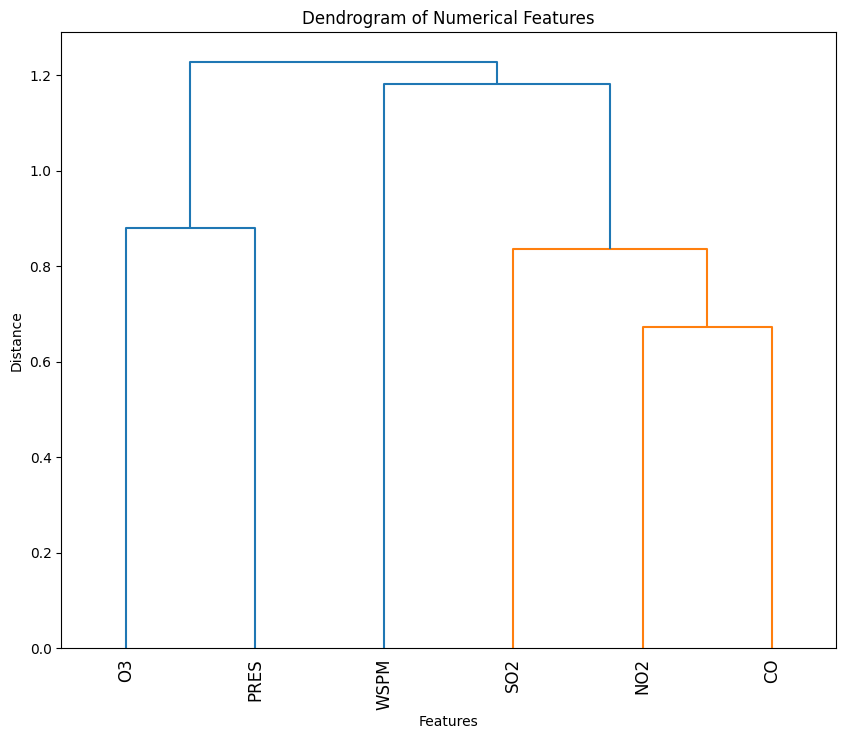

In [14]:

from scipy.cluster import hierarchy

correlation_matrix = prsa_data_normalized[numeric_columns].corr()

distance_matrix = 1 - np.abs(correlation_matrix)

Z = hierarchy.linkage(distance_matrix, method='average')

plt.figure(figsize=(10, 8))
hierarchy.dendrogram(Z, labels=numeric_columns, leaf_rotation=90)
plt.title('Dendrogram of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()
